# Introduction to Asset Returns
## 🎯 Learning Objectives

By the end of this notebook, you will be able to:

1. **Define and compute total returns** — From prices and dividends
2. **Distinguish returns from excess returns** — And explain why it matters
3. **Interpret risk premiums** — As compensation for bearing risk
4. **Apply proper data transformations** — Merge, clean, and resample return data

## 📋 Table of Contents

1. [Setup](#setup)
2. [What is a Stock Return?](#what-is-a-stock-return)
3. [Excess Returns](#excess-returns)
4. [Risk Premiums](#risk-premiums)
5. [Exercises](#exercises)
6. [Key Takeaways](#key-takeaways)

---

## 🛠️ Setup <a id="setup"></a>

In [24]:
#@title 🛠️ Setup: Run this cell first (click to expand)

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set consistent plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


---

## What is a Stock Return? <a id="what-is-a-stock-return"></a>

### The Core Question

Imagine you buy a stock today for **$100**.

Tomorrow it could be worth **$105** or **$95** or any other value.

How do we measure this change in a standardized way?

### The Return Formula

**Total return** measures percentage change including dividends:

$$
R_t = \frac{P_t + D_t - P_{t-1}}{P_{t-1}} = \frac{P_t + D_t}{P_{t-1}} - 1
$$

Where:
- $P_t$ = Price at end of period $t$
- $D_t$ = Dividend paid during period $t$  
- $P_{t-1}$ = Price at start of period

> **💡 Key Insight:**
>
> Returns, not prices, are the fundamental building block of finance.
> We use returns because they:
> - Are scale-free (comparable across stocks)
> - Aggregate naturally over time
> - Have better statistical properties

### Example: Computing Returns from Data

Let's load real stock data and compute returns. We'll use UnitedHealth (UNH).

In [25]:
# Load UNH stock data
url = 'https://raw.githubusercontent.com/amoreira2/UG54/main/assets/data/UNH_data.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Preview the data
print(f"Data range: {df.index.min().date()} to {df.index.max().date()}")
print(f"Columns: {list(df.columns)}")
df.head()
# df['D'].plot()

Data range: 1984-10-18 to 2024-12-31
Columns: ['P', 'D']


,P,D
date,,
1984-10-18,4.8750,0.0
1984-10-19,4.6875,0.0
1984-10-22,4.6875,0.0
1984-10-23,4.5625,0.0
1984-10-24,4.6875,0.0


The data contains:
- `P`: Adjusted closing price
- `D`: Dividend (0 on non-dividend days)

In [26]:
# Compute total return using the formula
df['ret'] = (df['P'] + df['D'] - df['P'].shift(1)) / df['P'].shift(1)

# Display first few rows with the new column
df[['P', 'D', 'ret']].head(10)

,P,D,ret
date,,,
1984-10-18,4.8750,0.0,NaN
1984-10-19,4.6875,0.0,-0.038462
1984-10-22,4.6875,0.0,0.000000
1984-10-23,4.5625,0.0,-0.026667
1984-10-24,4.6875,0.0,0.027397
1984-10-25,4.6250,0.0,-0.013333
1984-10-26,4.5625,0.0,-0.013514
1984-10-29,4.5625,0.0,0.000000
1984-10-30,4.6250,0.0,0.013699


> **📌 Remember:**
>
> The first observation is always `NaN` because we need a prior price.
> This is expected—we lose one observation when computing returns.

### Visualizing the Return Series

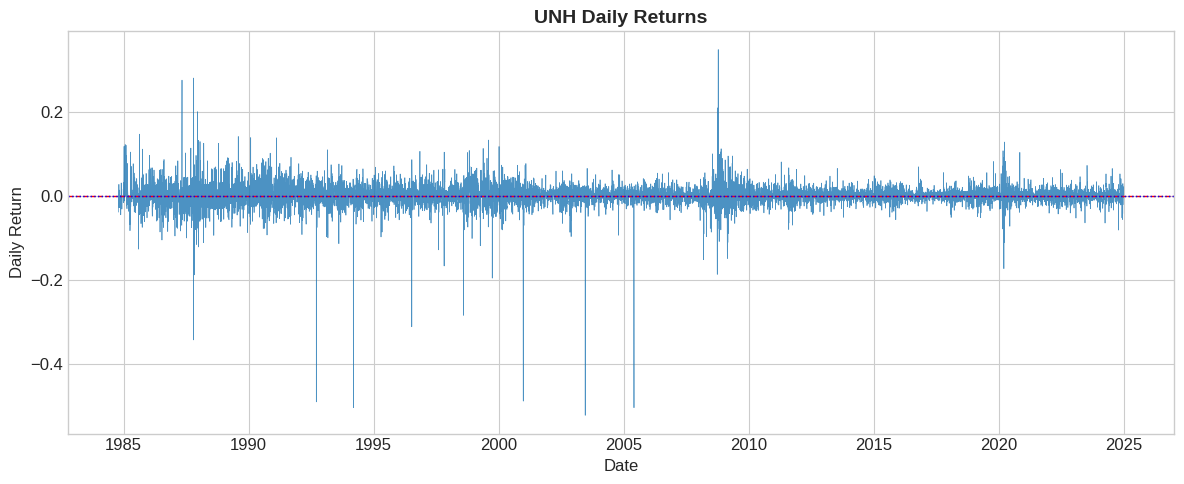

In [43]:
# Plot daily returns
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df.index, df['ret'], linewidth=0.5, alpha=0.8)
ax.axhline(0, color='red', linestyle='--', linewidth=1)
ax.axhline(df['ret'].mean(), color='blue', linestyle=':', linewidth=1)

ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')
ax.set_title('UNH Daily Returns', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Return Distribution

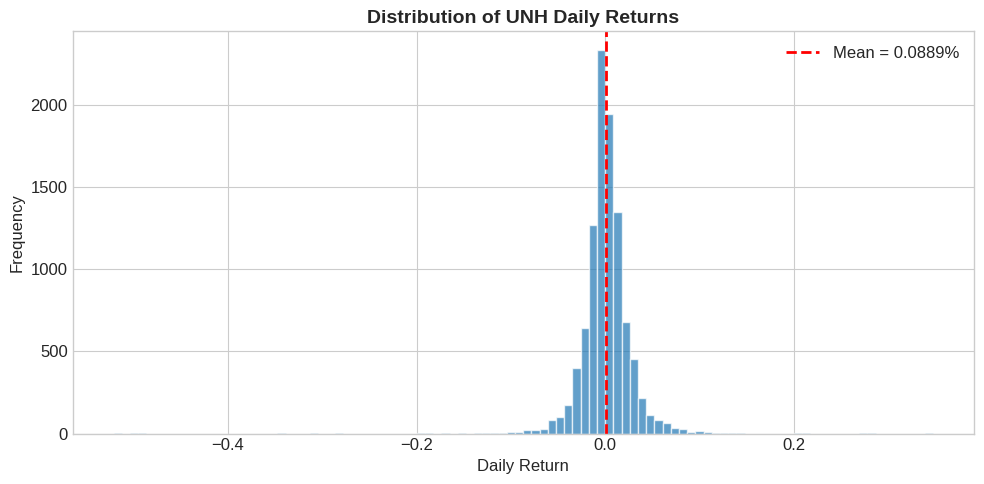

In [28]:
# Histogram of daily returns
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['ret'].dropna(), bins=100, edgecolor='white', alpha=0.7)
ax.axvline(df['ret'].mean(), color='red', linestyle='--',
           linewidth=2, label=f"Mean = {df['ret'].mean():.4%}")

ax.set_xlabel('Daily Return')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of UNH Daily Returns', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

### Summary Statistics

In [29]:
# Key summary statistics
mean_daily = df['ret'].mean()
std_daily = df['ret'].std()

# Annualize (252 trading days)
mean_annual = mean_daily * 252
std_annual = std_daily * np.sqrt(252)

print("━" * 40)
print("UNH Return Summary Statistics")
print("━" * 40)
print(f"Daily mean return:      {mean_daily:>10.4%}")
print(f"Daily std deviation:    {std_daily:>10.4%}")
print("━" * 40)
print(f"Annualized mean:        {mean_annual:>10.2%}")
print(f"Annualized volatility:  {std_annual:>10.2%}")
print("━" * 40)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
UNH Return Summary Statistics
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Daily mean return:         0.0889%
Daily std deviation:       2.7263%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Annualized mean:            22.40%
Annualized volatility:      43.28%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


> **💡 Key Insight:**
>
> - Means scale linearly with time: multiply by 252 (number of trading days in year)
> - Volatility scales with square root of time: multiply by $\sqrt{252}$

> The mean scalling is exact for log-returns, but an approximation for geometric returns
> For the variance scaling to be exact we need log-returns and iid returns
> This is because variance (not std) is additive for independent returns.
> It is standard to use these scaling as quick approximations
> Suppose your data is monthly how would you annualize?

---

## Excess Returns <a id="excess-returns"></a>

### Why Excess Returns?

A **10% return** sounds great, but what if risk-free bonds paid **8%**?

The stock only gave you **2% extra** for taking on stock market risk.

**Excess return** = Return − Risk-free rate

$$
R^e_t = R_t - R^f_t
$$

### Loading the Risk-Free Rate

We use Kenneth French's data library, which provides the 1-month T-bill rate.

In [30]:
import pandas_datareader.data as pdr

# Define a start date for data retrieval
start_date = '1900-01-01'
# Fetch daily Fama-French factors, including the risk-free rate
# The Fama-French data often comes as a dictionary of DataFrames, we need the first one for daily factors.
df_ff_daily = pdr.DataReader('F-F_Research_Data_Factors_Daily', 'famafrench', start=start_date)[0]
print("Fama-French daily factors loaded successfully!")
print(f"Data range: {df_ff_daily.index.min().date()} to {df_ff_daily.index.max().date()}")
df_ff_daily.head()



Fama-French daily factors loaded successfully!
Data range: 1926-07-01 to 2025-11-28


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.09,-0.25,-0.27,0.01
1926-07-02,0.45,-0.33,-0.06,0.01
1926-07-06,0.17,0.30,-0.39,0.01
1926-07-07,0.09,-0.58,0.02,0.01
1926-07-08,0.22,-0.38,0.19,0.01


> **⚠️ Caution:**
>
> The risk-free rate is sometimes reported as an **annual percentage**.
> if that is the case need to divide by 100 and 252 (number of tradign days)
> how do you know what to do?

In [31]:
display(df_ff_daily.loc['2024',:].mean())

display(df_ff_daily.loc['2024',:].mean()*252)

display(df_ff_daily.loc['2024',:].mean()*252/100)

,0
Mkt-RF,0.071706
SMB,-0.033373
HML,-0.028532
RF,0.020000


,0
Mkt-RF,18.07
SMB,-8.41
HML,-7.19
RF,5.04


,0
Mkt-RF,0.1807
SMB,-0.0841
HML,-0.0719
RF,0.0504


In [32]:



# The RF column in df_ff_daily is in percentage (e.g., 0.01 means 0.01%), so convert to decimal by dividing by 100.
# Should you?
df_ff_daily['RF_decimal'] = df_ff_daily['RF'] / 100
# Convert annual risk-free rate to daily rate by dividing by 252 (trading days in a year)
df_ff_daily['rf_daily'] = df_ff_daily['RF_decimal']

# Merge risk-free rate with stock data (df - UNH data)
# Ensure both dataframes have the same index name for merging
df_ff_daily.index.name = 'date'
df_merged = df.merge(df_ff_daily[['rf_daily']], left_index=True, right_index=True, how='left')

print("Risk-free daily rates calculated and merged with UNH data.")
print("First few rows of df with new 'rf_daily' column:")
df_merged.head()

Risk-free daily rates calculated and merged with UNH data.
First few rows of df with new 'rf_daily' column:


,P,D,ret,rf_daily
date,,,,
1984-10-18,4.8750,0.0,NaN,0.0004
1984-10-19,4.6875,0.0,-0.038462,0.0004
1984-10-22,4.6875,0.0,0.000000,0.0004
1984-10-23,4.5625,0.0,-0.026667,0.0004
1984-10-24,4.6875,0.0,0.027397,0.0004


### Computing Excess Returns

In [33]:
# Compute excess return
df_merged['ret_excess'] = df_merged['ret'] - df_merged['rf_daily']

# Compare return vs excess return
print("━" * 50)
print("Comparison: Return vs Excess Return")
print("━" * 50)
print(f"Mean return:         {df_merged['ret'].mean():>12.4%}")
print(f"Mean excess return:  {df_merged['ret_excess'].mean():>12.4%}")
print(f"Mean rf (daily):     {df_merged['rf_daily'].mean():>12.4%}")
print("━" * 50)
print(f"Std return:          {df_merged['ret'].std():>12.4%}")
print(f"Std excess return:   {df_merged['ret_excess'].std():>12.4%}")
print("━" * 50)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Comparison: Return vs Excess Return
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Mean return:              0.0889%
Mean excess return:       0.0766%
Mean rf (daily):          0.0124%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Std return:               2.7263%
Std excess return:        2.7262%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


> **💡 Key Insight:**
>
> Notice the standard deviations are nearly identical.
>
> This is because the risk-free rate is (nearly) constant day-to-day.
> Subtracting a constant shifts the mean but doesn't change volatility much.
>
> But the risk-free rate..is risk-free..should it change the variance at all?



## Excess returns as long-short trading strategies

- Excess returns are a nice way to look at an asset because it strips out the time-value of money aspect form it
- Excess returns is really the return on a strategy that invests 1 in the risky asset and finance the position by borrowing at the risk-free rate

$$wR^e=(w)R+(-w)R_f=w(R-R_f)$$

- how much buying w dollars of Apple stock excess return cost you?


## Long-short trading strategies are self-financed

- This means that you don't need any cash to invest in it
- you borrow all you need
- of course you will bear risk. Banks will lend you if they expect to get paid
- so in practice you will have limits on how many dollars on the strategy
- For example you will be required to post collateral to support the trade
- It is no different from when you buy a house with a mortage


---

## Risk Premiums <a id="risk-premiums"></a>

### From Excess Returns to Risk Premiums

**Risk premium** = Expected excess return = $E[R - R^f]$

This is the **expected** compensation for bearing risk.

In practice, we estimate it as the **sample average** of excess returns.

In [34]:
# Estimate risk premium (sample average of excess returns)
risk_premium_daily = df_merged['ret_excess'].mean()
risk_premium_annual = risk_premium_daily * 252

print(f"Estimated UNH Risk Premium")
print(f"━" * 30)
print(f"Daily:     {risk_premium_daily:>8.4%}")
print(f"Annual:    {risk_premium_annual:>8.2%}")

Estimated UNH Risk Premium
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Daily:      0.0766%
Annual:      19.29%


### The Sharpe Ratio

How much return do we get **per unit of risk**?

$$
\text{Sharpe Ratio} = \frac{E[R^e]}{\sigma(R^e)} = \frac{\text{Risk Premium}}{\text{Volatility}}
$$

In [35]:
# Compute Sharpe ratio
sharpe_daily = df_merged['ret_excess'].mean() / df_merged['ret_excess'].std()
sharpe_annual = sharpe_daily * np.sqrt(252)  # Sharpe scales with sqrt(T)

print(f"UNH Sharpe Ratio")
print(f"━" * 30)
print(f"Daily:     {sharpe_daily:>8.4f}")
print(f"Annual:    {sharpe_annual:>8.2f}")

UNH Sharpe Ratio
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Daily:       0.0281
Annual:        0.45


> **📌 Remember:**
>
> - Sharpe Ratio > 0.5 (annual) is considered good
> - Sharpe Ratio > 1.0 (annual) is exceptional
> - The S&P 500 has a historical Sharpe Ratio of about 0.4-0.5
> - Why we might care about the Sharpe Ratio?

### Cumulative Returns: The Power of Compounding

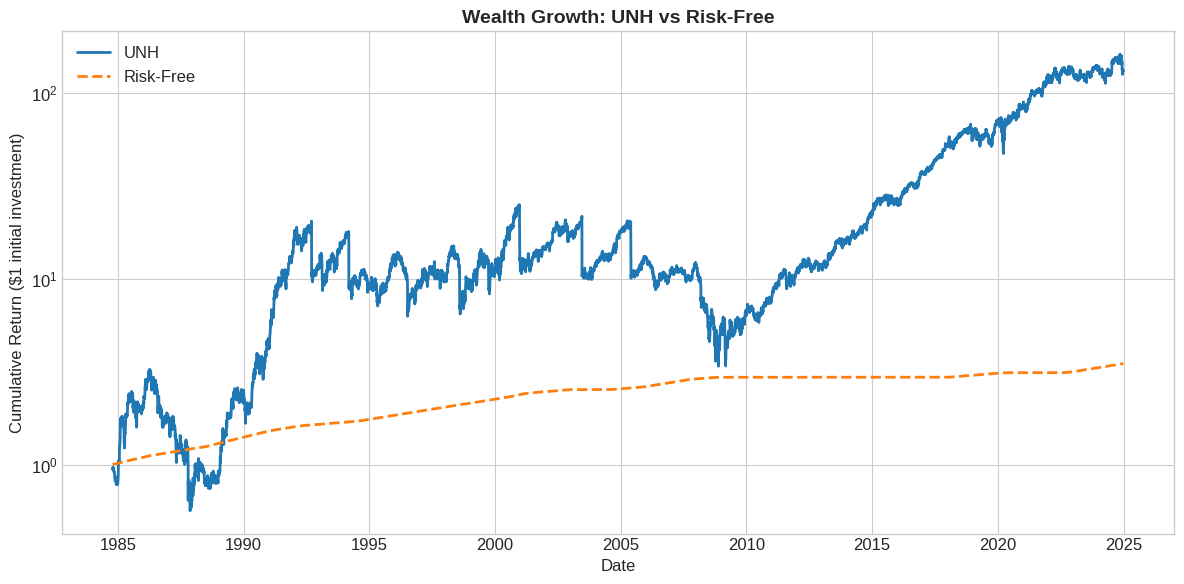

In [36]:
# Compute cumulative returns (wealth growth from $1)
df_merged['cum_ret'] = (1 + df_merged['ret']).cumprod()
df_merged['cum_rf'] = (1 + df_merged['rf_daily']).cumprod()

# Plot cumulative returns
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_merged.index, df_merged['cum_ret'], label='UNH', linewidth=2)
ax.plot(df_merged.index, df_merged['cum_rf'], label='Risk-Free', linewidth=2, linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return ($1 initial investment)')
ax.set_title('Wealth Growth: UNH vs Risk-Free', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax.set_yscale('log')

plt.tight_layout()
plt.show()

> **💡 Key Insight:**
>
> The gap between the lines is the cumulative **excess return**.
> This is the total compensation you received for bearing stock risk.

---

## 📝 Exercises <a id="exercises"></a>

### Exercise 1: Warm-up — Basic Return Calculation

> **🔧 Exercise:**
>
> A stock has the following prices over 4 days (no dividends):
> - Day 0: $50
> - Day 1: $52
> - Day 2: $48
> - Day 3: $51
>
> 1. Compute the daily returns for Days 1, 2, and 3
> 2. Compute the cumulative return over the 3-day period
> 3. Verify: $(1+R_1) \times (1+R_2) \times (1+R_3) - 1$ equals the cumulative return

In [37]:
# Your code here
prices = [50, 52, 48, 51]

# Compute daily returns


# Compute cumulative return


# Verify

<details>
<summary>💡 Click to see solution</summary>

```python
prices = [50, 52, 48, 51]

# Compute daily returns
R1 = (52 - 50) / 50  # 4%
R2 = (48 - 52) / 52  # -7.69%
R3 = (51 - 48) / 48  # 6.25%

print(f"Day 1 return: {R1:.4%}")
print(f"Day 2 return: {R2:.4%}")
print(f"Day 3 return: {R3:.4%}")

# Cumulative return: (51 - 50) / 50 = 2%
cum_ret = (51 - 50) / 50
print(f"\nCumulative return: {cum_ret:.4%}")

# Verify via compounding
compounded = (1 + R1) * (1 + R2) * (1 + R3) - 1
print(f"Compounded returns: {compounded:.4%}")
```
</details>

### Exercise 2: Extension — Another Stock

> **🤔 Think and Code:**
>
> Load data for another stock and compare to UNH:
>
> 1. Load the SPY-WMT-JPM dataset from the URL below
> 2. Compute daily returns for SPY (the S&P 500 ETF)
> 3. Compare the annualized mean and volatility to UNH
> 4. Which investment had a higher Sharpe Ratio?

In [38]:
# Your code here
url2 = 'https://raw.githubusercontent.com/amoreira2/UG54/main/assets/data/df_SPYWMTJPM_data.csv'



<details>
<summary>💡 Click to see solution</summary>

```python
url2 = 'https://raw.githubusercontent.com/amoreira2/UG54/main/assets/data/df_SPYWMTJPM_data.csv'
df2 = pd.read_csv(url2, parse_dates=['date'], index_col='date')



# Annualized statistics
spy_mean = df2['SPY'].mean() * 252
spy_std = df2['SPY'].std() * np.sqrt(252)
spy_sharpe = spy_mean / spy_std

print(f"SPY: Mean = {spy_mean:.2%}, Vol = {spy_std:.2%}, Sharpe = {spy_sharpe:.2f}")
print(f"UNH: Mean = {mean_annual:.2%}, Vol = {std_annual:.2%}")
```
</details>

### Exercise 3: Open-ended — Risk Analysis

> **🤔 Think and Code:**
>
> You have $1 million invested in UNH:
>
> 1. Estimate the 5th percentile of daily returns (Value at Risk proxy)
> 2. What dollar amount could you lose on a "bad day" (5% probability)?
> 3. Find the worst single-day loss in the sample
> 4. Plot the distribution with the 5th percentile and worst day marked
> 5. **Discuss:** Is the normal distribution a good model for stock returns?

In [39]:
# Your code here
portfolio_value = 1_000_000

# 5th percentile


# Dollar loss


# Worst day


# Plot


<details>
<summary>💡 Click to see solution</summary>

```python
portfolio_value = 1_000_000

# 5th percentile (empirical VaR)
var_5 = df_merged['ret'].quantile(0.05)
print(f"5th percentile return: {var_5:.4%}")

# Dollar loss
dollar_loss = portfolio_value * abs(var_5)
print(f"5% daily VaR: ${dollar_loss:,.0f}")

# Worst day
worst_day = df_merged['ret'].min()
worst_date = df_merged['ret'].idxmin()
print(f"Worst day: {worst_day:.4%} on {worst_date.date()}")

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['ret'].dropna(), bins=100, edgecolor='white', alpha=0.7)
ax.axvline(var_5, color='orange', linestyle='--', linewidth=2, label=f'5% VaR: {var_5:.2%}')
ax.axvline(worst_day, color='red', linestyle='--', linewidth=2, label=f'Worst: {worst_day:.2%}')
ax.legend()
ax.set_title('UNH Return Distribution with Risk Measures')
plt.show()

# Discussion: Returns have "fat tails" - extreme events are more
# common than a normal distribution would predict.
```
</details>

### Exercise 4: Challenge — Rolling Analysis

> **🔧 Exercise:**
>
> Compute and plot the **rolling 252-day Sharpe Ratio** for UNH:
>
> 1. Create a rolling 252-day window
> 2. For each window, compute: mean excess return / std excess return × √252
> 3. Plot the rolling Sharpe Ratio over time
> 4. Identify periods of exceptionally high or low risk-adjusted performance
> 5. What do we learn from this plot?

In [40]:
# Your code here


<details>
<summary>💡 Click to see solution</summary>

```python
# Rolling Sharpe Ratio
window = 252
rolling_mean = df_merged['ret_excess'].rolling(window).mean()
rolling_std = df_merged['ret_excess'].rolling(window).std()
df_merged['rolling_sharpe'] = (rolling_mean / rolling_std) * np.sqrt(252)

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_merged.index, df_merged['rolling_sharpe'], linewidth=1.5)
ax.axhline(0, color='red', linestyle='--', linewidth=1)
ax.axhline(0.5, color='green', linestyle=':', linewidth=1, alpha=0.5, label='Good (0.5)')
ax.axhline(1.0, color='green', linestyle=':', linewidth=1, alpha=0.8, label='Excellent (1.0)')

ax.set_xlabel('Date')
ax.set_ylabel('Rolling 1-Year Sharpe Ratio')
ax.set_title('UNH Rolling Sharpe Ratio', fontsize=14, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()
```
</details>

---

## 🧠 Key Takeaways <a id="key-takeaways"></a>

1. **Total Return** = $(P_t + D_t - P_{t-1}) / P_{t-1}$ — Captures price change AND dividends

2. **Excess Return** = Return − Risk-free rate — Measures compensation for risk

3. **Risk Premium** = E[Excess Return] — The expected reward for bearing risk

4. **Sharpe Ratio** = Risk Premium / Volatility — Risk-adjusted performance measure

5. **Annualizing:** Means multiply by 252, volatility by √252, Sharpe by √252

6. **Think carefully:** how exactly to measure what I want in the data